## Simple Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('../../03_data-visualization/02_lab-matplotlib-seaborn/your-code/Fitbit2.csv') 
data.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


### Simple Regression Plot

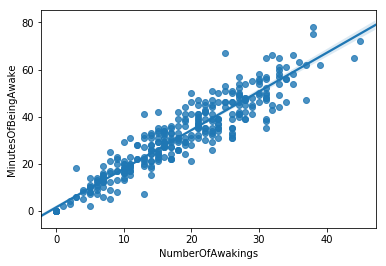

In [3]:
sns.regplot(x="NumberOfAwakings", y="MinutesOfBeingAwake", data=data)

[MinutesOfBeingAwake] = b0 + b1*[NumberOfAwakings]

### Estimating OLS using statsmodels

In [4]:
import statsmodels.api as sm

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [ ]:
help(sm.OLS)

In [5]:
X = data['NumberOfAwakings']
Y = data['MinutesOfBeingAwake']
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     MinutesOfBeingAwake   R-squared:                       0.906
Model:                             OLS   Adj. R-squared:                  0.906
Method:                  Least Squares   F-statistic:                     3516.
Date:                 Sat, 07 Nov 2020   Prob (F-statistic):          1.89e-189
Time:                         16:36:28   Log-Likelihood:                -1158.1
No. Observations:                  367   AIC:                             2320.
Df Residuals:                      365   BIC:                             2328.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.4381      0.538      2.675      0.008       0.381       2.495
NumberOfAwakings     1.6405      0.028     59.297      0.000       1.586       1.695
==============================================================================
Omnibus:                       17.535   Durbin-Watson:                   1.830
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.142
Skew:                           0.290   Prob(JB):                     1.73e-07
Kurtosis:                       4.304   Cond. No.                         35.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Estimating OLS parameters using scipy.stats

In [6]:
from scipy.stats import linregress
help(linregress)

Help on function linregress in module scipy.stats._stats_mstats_common:

linregress(x, y=None)
    Calculate a linear least-squares regression for two sets of measurements.
    
    Parameters
    ----------
    x, y : array_like
        Two sets of measurements.  Both arrays should have the same length.
        If only x is given (and y=None), then it must be a two-dimensional
        array where one dimension has length 2.  The two sets of measurements
        are then found by splitting the array along the length-2 dimension.
    
    Returns
    -------
    slope : float
        slope of the regression line
    intercept : float
        intercept of the regression line
    rvalue : float
        correlation coefficient
    pvalue : float
        two-sided p-value for a hypothesis test whose null hypothesis is
        that the slope is zero, using Wald Test with t-distribution of
        the test statistic.
    stderr : float
        Standard error of the estimated gradient.
    
  

In [7]:
X = data['NumberOfAwakings']
Y = data['MinutesOfBeingAwake']
slope, intercept, r_value, p_value, std_err  = linregress(X, Y)
print ('The slope is: ' + str(slope))
print ('The intercept is: ' + str(intercept))

The slope is: 1.6405141436199782
The intercept is: 1.438103352378338


#### Calculating Confidence Intervals

In [ ]:
from scipy import stats
help(stats.t.interval)
d_freedom = len(Y) - 2
stats.t.interval(0.95, d_freedom, slope, std_err)

#### Predictions

In [ ]:
predictions = [intercept + slope*x for x in X]
print(predictions)

In [ ]:
np.corrcoef(Y, predictions)
plt.scatter(Y, predictions)

#### Calculating residuals

In [ ]:
residuals = [Y[i] - predictions[i] for i in range(len(Y))]

## Using sklearn

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
help(linear_model.LinearRegression)

In [ ]:
X = X.values.reshape(-1, 1)
lm = linear_model.LinearRegression()
model = lm.fit(X,Y)
lm.score(X,Y)

In [ ]:
print(lm.intercept_)
print(lm.coef_)
predictions = lm.predict(X)
print(r2_score(Y, predictions))
print(mean_squared_error(Y, predictions))


## Logistic Regression

In [ ]:
churn = pd.read_csv('../../04_bi-tableau/04_lab-bi-analysis-with-tableau/data/churn.csv')

In [ ]:
churn.head()

In [ ]:
churn.dtypes

In [ ]:
churn['Churn']

In [ ]:
Y = pd.DataFrame(np.where(churn['Churn']=='Yes', 1, 0))
X = churn[['MonthlyCharges']]
X = sm.add_constant(X)
model = sm.Logit(Y, X).fit()
model.summary()